|Challenge Set |**1 **                     |
|-------------:|:--------------------------|
|Topic:        |Explore MTA turnstile data |
|Date:         |07/10/2016                 | 
|Name:         |Bryant Biggs               |
|Worked with:  |N/A                        |

---
# WRITTEN FOR PYTHON 3
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from collections import Counter

# Challenge 1
* Download a few MTA turnstile data files
* Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like

In [2]:
# pull data down from web
!rm -r *.csv
!touch 'clean.csv'

!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt >> 'a.csv'
!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt >> 'b.csv'
!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt >> 'c.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  3477k      0 --:--:--  0:00:07 --:--:-- 5069k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  4019k      0 --:--:--  0:00:06 --:--:-- 4848k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  3095k      0 --:--:--  0:00:07 --:--:-- 3014k


In [3]:
labels = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']

In [4]:
files = ['a.csv','b.csv','c.csv']
count = 0
for file in files:
    # strip whitespace from cells
    with open(file) as f:
        reader = csv.reader(f)
        rows = [[cell.strip() for cell in row] for row in reader]

    # write to csv file with header at top (skip intermediate headers from separate downloads)
    with open('clean.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        if count < 1:
            writer.writerow(labels)
            count += 1
        for row in rows:
            if labels[0] not in row:
                writer.writerow(row)

In [5]:
assert rows.pop(0) == labels

In [6]:
# creat dictionary as instructed {(C/A, UNIT, SCP, STATION): Rest}
turnstile_dict = {}

with open('clean.csv', 'r', newline='') as cleanfile:
        reader = csv.reader(cleanfile)
        for row in reader:
            turnstile_dict.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

In [7]:
# Un-comment below to see one dictonary entry
# turnstile_dict[('PTH21', 'R540', '01-03-00', 'PATH WTC 2')]

## Answer for Challenge 1 is:
### ```turnstile_dict```
___

# Challenge 2
Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

In [8]:
# extract only pertinent fields, convert to datetime object, and entries to integer
datetime_dict = {turnstile: [(datetime.strptime(date + time, '%m/%d/%Y%X'), int(entries)) 
                 for _, _, date, time, _, entries, _ in row if turnstile != "" and "C/A" not in turnstile and row != []] 
                 for turnstile, row in turnstile_dict.items()}

In [9]:
# calculate difference to get entries by day per by block of time
datetime_dict = {turnstile: [[rows[i][0], rows[i+1][1] - rows[i][1]]
                            for i in range(len(rows) - 1)]
                            for turnstile, rows in datetime_dict.items()}

In [10]:
# remove negative values and values larger than 5,000
datetime_dict = {turnstile: [(time, count)
                           for (time, count) in rows
                           if 0 <= count <= 5000]
                           for turnstile, rows in datetime_dict.items() if rows != []}

In [11]:
# Un-comment below to see one dictonary entry
# datetime_dict[('PTH21', 'R540', '01-03-00', 'PATH WTC 2')]

## Answer for Challenge 2 is:
### ```datetime_dict```
___

# Challenge 3
These counts are for every n hours. (What is n?) We want total daily entries.

Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [12]:
#  aggregate dictionary values by day
entries_day_dict = {}
for turnstile, rows in datetime_dict.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    entries_day_dict[turnstile] = sorted(by_day.items())

In [13]:
# One dictonary entry with key as ('C/A','UNIT','SCP','STATION')
entries_day_dict[('PTH21', 'R540', '01-03-00', 'PATH WTC 2')]

[(datetime.date(2016, 4, 9), 411),
 (datetime.date(2016, 4, 10), 468),
 (datetime.date(2016, 4, 11), 579),
 (datetime.date(2016, 4, 12), 489),
 (datetime.date(2016, 4, 13), 556),
 (datetime.date(2016, 4, 14), 544),
 (datetime.date(2016, 4, 15), 628),
 (datetime.date(2016, 4, 16), 579),
 (datetime.date(2016, 4, 17), 621),
 (datetime.date(2016, 4, 18), 652),
 (datetime.date(2016, 4, 19), 522),
 (datetime.date(2016, 4, 20), 557),
 (datetime.date(2016, 4, 21), 301),
 (datetime.date(2016, 4, 22), 650),
 (datetime.date(2016, 4, 23), 657),
 (datetime.date(2016, 4, 24), 624),
 (datetime.date(2016, 4, 25), 565),
 (datetime.date(2016, 4, 26), 534),
 (datetime.date(2016, 4, 27), 607),
 (datetime.date(2016, 4, 28), 632),
 (datetime.date(2016, 4, 29), 557)]

## Answer for Challenge 3 is:
### ```entries_day_dict```
___

# Challenge 4
We will plot the daily time series for a turnstile.

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

In [14]:
key = ('PTH21', 'R540', '01-03-00', 'PATH WTC 2')
days = []
counts = []
for day, count in entries_day_dict[key]:
    days.append(day)
    counts.append(count)

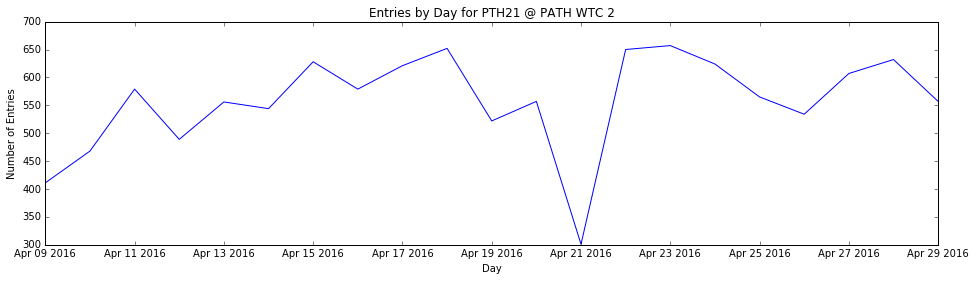

In [15]:
plt.figure(figsize=(16,4))
plt.ylabel('Number of Entries')
plt.xlabel('Day')
plt.title('Entries by Day for PTH21 @ PATH WTC 2')
plt.plot(days,counts)

## Chart above is answer for Challenge 4
___

# Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [16]:
# condense dictionary down to {(C/A, UNIT, STATION): Rest}
ca_unit_station_dict = {}

for turnstile, rows in sorted(entries_day_dict.items()):
    ca, unit, _, station = turnstile
    key = (ca, unit, station)
    
    new_dict = {}
    
    # if key not in new dictionary, move key-value pair into new_dict
    if key not in ca_unit_station_dict:
        ca_unit_station_dict[key] = [[day, count] for day, count in rows]
    
    else:
        # otherwise sum new_dict values with entries_day_dict values in new_dict
        for date, count in rows:
            if date not in new_dict:
                new_dict[date] = count
            else:
                new_dict[date] = new_dict[date] + count
        
        for date, count in ca_unit_station_dict[key]:
            if date not in new_dict:
                new_dict[date] = count
            else:
                new_dict[date] = new_dict[date] + count
        
        ca_unit_station_dict[key] = sorted(new_dict.items())

In [17]:
# One dictonary entry with key as ('C/A','UNIT','STATION')
ca_unit_station_dict[('PTH21', 'R540', 'PATH WTC 2')]

[[datetime.date(2016, 4, 9), 411],
 [datetime.date(2016, 4, 10), 468],
 [datetime.date(2016, 4, 11), 579],
 [datetime.date(2016, 4, 12), 489],
 [datetime.date(2016, 4, 13), 556],
 [datetime.date(2016, 4, 14), 544],
 [datetime.date(2016, 4, 15), 628],
 [datetime.date(2016, 4, 16), 579],
 [datetime.date(2016, 4, 17), 621],
 [datetime.date(2016, 4, 18), 652],
 [datetime.date(2016, 4, 19), 522],
 [datetime.date(2016, 4, 20), 557],
 [datetime.date(2016, 4, 21), 301],
 [datetime.date(2016, 4, 22), 650],
 [datetime.date(2016, 4, 23), 657],
 [datetime.date(2016, 4, 24), 624],
 [datetime.date(2016, 4, 25), 565],
 [datetime.date(2016, 4, 26), 534],
 [datetime.date(2016, 4, 27), 607],
 [datetime.date(2016, 4, 28), 632],
 [datetime.date(2016, 4, 29), 557]]

## Answer for Challenge 5 is:
### ```ca_unit_station_dict```
___

# Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [18]:
# condense dictionary down to {(STATION): Rest}
station_dict = {}

for turnstile, entries in sorted(ca_unit_station_dict.items()):
    _, _, station = turnstile
    
    new_dict = {}
    
    # if key not in new dictionary, move key-value pair into new_dict
    if station not in station_dict:
        station_dict[station] = [[day, count] for day, count in entries]
    
    else:
        # otherwise sum new_dict values with ca_unit_station_dict values in new_dict
        for date, count in entries:
            if date not in new_dict:
                new_dict[date] = count
            else:
                new_dict[date] = new_dict[date] + count
        
        for date, count in station_dict[station]:
            if date not in new_dict:
                new_dict[date] = count
            else:
                new_dict[date] = new_dict[date] + count
        
        station_dict[station] = sorted(new_dict.items())

In [19]:
# One dictonary entry with key as ('STATION')
station_dict[('PATH WTC 2')]

[[datetime.date(2016, 4, 9), 411],
 [datetime.date(2016, 4, 10), 468],
 [datetime.date(2016, 4, 11), 579],
 [datetime.date(2016, 4, 12), 489],
 [datetime.date(2016, 4, 13), 556],
 [datetime.date(2016, 4, 14), 544],
 [datetime.date(2016, 4, 15), 628],
 [datetime.date(2016, 4, 16), 579],
 [datetime.date(2016, 4, 17), 621],
 [datetime.date(2016, 4, 18), 652],
 [datetime.date(2016, 4, 19), 522],
 [datetime.date(2016, 4, 20), 557],
 [datetime.date(2016, 4, 21), 301],
 [datetime.date(2016, 4, 22), 650],
 [datetime.date(2016, 4, 23), 657],
 [datetime.date(2016, 4, 24), 624],
 [datetime.date(2016, 4, 25), 565],
 [datetime.date(2016, 4, 26), 534],
 [datetime.date(2016, 4, 27), 607],
 [datetime.date(2016, 4, 28), 632],
 [datetime.date(2016, 4, 29), 557]]

## Answer for Challenge 6 is:
### ```station_dict```
___

# Challenge 7
Plot the time series for a station.

In [20]:
key = ('PATH WTC 2')
dates = []
entries = []
for day, count in station_dict[key]:
    dates.append(day)
    entries.append(count)

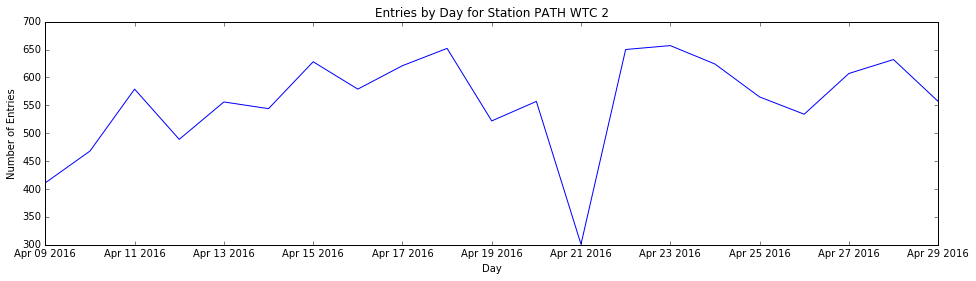

In [21]:
plt.figure(figsize=(16,4))
plt.ylabel('Number of Entries')
plt.xlabel('Day')
plt.title('Entries by Day for Station PATH WTC 2')
plt.plot(dates, entries)

## Chart above is answer for Challenge 7
___

# Challenge 8
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

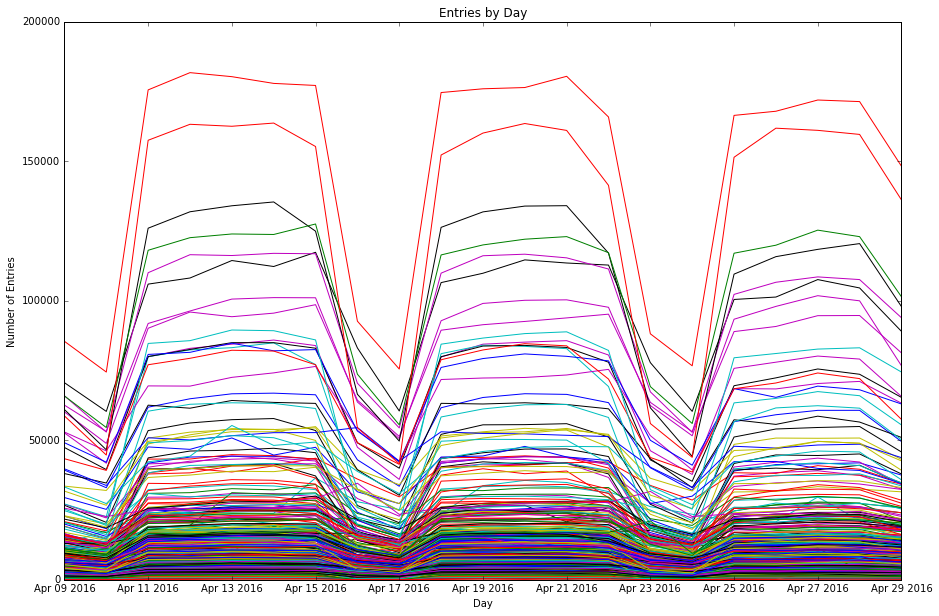

In [22]:
plt.figure(figsize=(15,10))
plt.ylabel('Number of Entries')
plt.xlabel('Day')
plt.title('Entries by Day')

for station, counts in station_dict.items():
    ct_lst = [ct for day, ct in station_dict[station]]
    day_lst = [day for day, ct in station_dict[station]]
    plt.plot(day_lst, ct_lst)
    

## Chart above is answer for Challenge 8
___

# Challenge 9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [23]:
# condense dictionary down to {(STATION): Sum}
sum_dict = {} 

for station, entries in sorted(station_dict.items()):
    sum_dict[station] = sum(count for day, count in entries)

In [24]:
# One dictonary entry with key as ('STATION')
sum_dict[('PATH WTC 2')]

11733

## Answer for Challenge 9 is:
### ```sum_dict```
___

# Challenge 10
Make a single list of these total ridership values and plot it with
* plt.hist(total_ridership_counts)

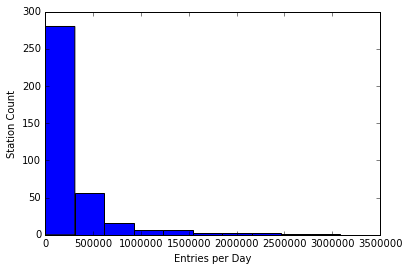

In [25]:
#plt.figure(figsize=(15,10))
total_rider_counts = [counts for station, counts in sum_dict.items()]
plt.hist(total_rider_counts)
plt.ylabel('Station Count')
plt.xlabel('Entries per Day')

<Container object of 373 artists>

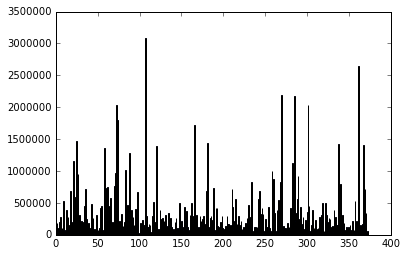

In [27]:
indices = range(len(total_rider_counts))
plt.bar(range(len(total_rider_counts)), total_rider_counts)

## Chart above is answer for Challenge 10